In [66]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, array_to_latex
from math import sqrt, pi
from IPython.display import display, Math

The CSwap operation is implemented as follows

In [67]:
cswap = QuantumCircuit(3)
cswap.cx(0,1)
cswap.ccx(2,1,0)
cswap.cx(0,1)

cswap.draw()

unitarysim = Aer.get_backend('aer_simulator')
cswap.save_unitary()
qobj = assemble(cswap)
unitary = unitarysim.run(qobj).result().get_unitary()
display(array_to_latex(unitary, prefix="\\text{Circuit = }\n"))

<IPython.core.display.Latex object>

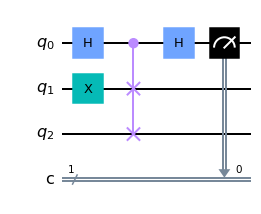

In [68]:
q = QuantumRegister(3,'q')
c = ClassicalRegister(1,'c')

qswap = QuantumCircuit(q,c)
qswap.h(q[0]) #Applying a Hadamard gate
qswap.x(q[1]) #Comment to make both states non-orthogonal
qswap.cswap(q[0],q[1],q[2]) # Contolled SWAP gate
qswap.h(q[0]) 
qswap.measure(q[0],c[0]) #Measuring the qubit

qswap.draw()

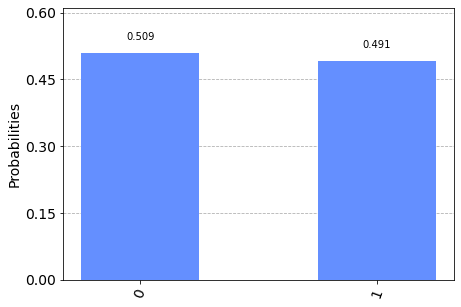

In [69]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qswap).result()
counts = result.get_counts()
plot_histogram(counts)

The experimental verification of the above simulation is done below.

{'1': 610, '0': 414}
{'1': 601, '0': 423}
{'1': 620, '0': 404}
{'0': 439, '1': 585}
{'0': 412, '1': 612}
{'1': 597, '0': 427}
{'0': 431, '1': 593}
{'1': 599, '0': 425}
{'1': 603, '0': 421}
{'1': 609, '0': 415}
{'1': 588, '0': 436}
{'0': 415, '1': 609}
{'0': 414, '1': 610}
{'1': 595, '0': 429}
{'0': 421, '1': 603}
{'0': 418, '1': 606}
{'1': 615, '0': 409}
{'1': 611, '0': 413}
{'0': 407, '1': 617}
{'0': 397, '1': 627}
{'0': 405, '1': 619}
{'1': 588, '0': 436}
{'0': 427, '1': 597}
{'1': 621, '0': 403}
{'1': 619, '0': 405}
{'0': 411, '1': 613}
{'0': 426, '1': 598}
{'0': 404, '1': 620}
{'1': 585, '0': 439}
{'1': 606, '0': 418}
{'0': 420, '1': 604}
{'0': 433, '1': 591}
{'0': 413, '1': 611}
{'1': 629, '0': 395}
{'0': 414, '1': 610}
{'0': 427, '1': 597}
{'0': 405, '1': 619}
{'0': 457, '1': 567}
{'1': 601, '0': 423}
{'0': 436, '1': 588}
{'0': 412, '1': 612}
{'1': 595, '0': 429}
{'1': 581, '0': 443}
{'0': 408, '1': 616}
{'1': 595, '0': 429}
{'0': 436, '1': 588}
{'0': 398, '1': 626}
{'0': 405, '1

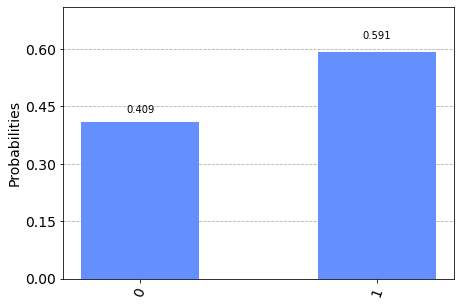

In [85]:
sim = Aer.get_backend('aer_simulator') 
num_zero = 0
num_one = 0
for i in range(100):
    result = sim.run(qswap).result()
    counts = result.get_counts()
    print(counts)
    num_zero+= counts['0']
    num_one+= counts['1']
print(num_zero,num_one)
counts = {'0':num_zero,'1':num_one}
a = (num_zero - num_one)/(num_zero + num_one)
if a<0 : 
    a = 0
a = np.sqrt(a)
print("Inner product = ",a)
print(counts)
plot_histogram(counts)

Ans 2) The measurement gate on the first qubit ensures that it is 0 with a probability

P = (1 + (Inner Product)^2)/2

The downside of this test is that the qubits cannot be recovered to the same state as before. Hence |ψ⟩,|ϕ⟩| must be prepared multiple times independently in order to get a good probability estimate and hence the value of inner product. By running the experiment a sufficiently large number of times, we can get the square of the inner product. The sign can be determined by inspection.

In [70]:
if '1' in counts:
    b = counts['1']
else:
    b = 0
    
s = 1-(2/nShots)*(b)

print("Squared Inner Product:",str(s))
print("Counts: ",counts)

Squared Inner Product: 0.877197265625
Counts:  {'0': 521, '1': 503}


Now for an example set of states we see:

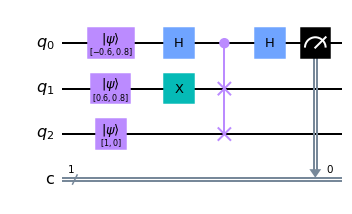

In [78]:
qswap = QuantumCircuit(q,c)

#initializing the example set
qswap.initialize([1,0], 2)
qswap.initialize([3/5,4/5], 1)
qswap.initialize([-3/5,4/5], 0)

qswap.h(q[0]) #Applying a Hadamard gate
qswap.x(q[1]) #Comment to make both states non-orthogonal
qswap.cswap(q[0],q[1],q[2]) # Contolled SWAP gate
qswap.h(q[0]) 
qswap.measure(q[0],c[0]) #Measuring the qubit

qswap.draw()

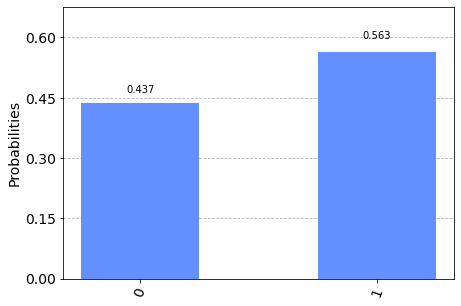

In [79]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qswap).result()
counts = result.get_counts()
plot_histogram(counts)


If we aren't keeping the states that we performed the swap test on, we don't need to use CSWAPs to perform the swap test. We can instead just pair up the qubits from each system, perform Bell basis measurements on them, and count whether we see the 11 result an odd or even number of times.

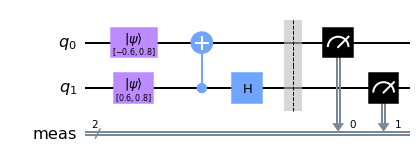

In [80]:
bell = QuantumCircuit(2)
bell.initialize([3/5,4/5], 1)
bell.initialize([-3/5,4/5], 0)
bell.cx(1,0)
bell.h(1)
bell.measure_all()
bell.draw()

{'11': 446, '00': 35, '10': 543}
0.2645751311064591


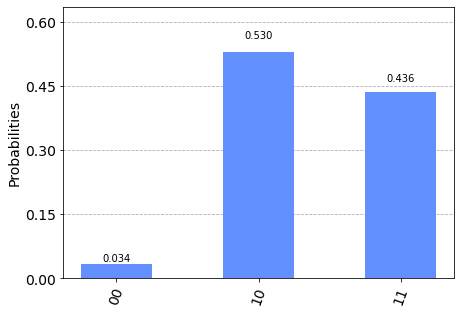

In [81]:
qsim = Aer.get_backend('aer_simulator') 
result = qsim.run(bell).result()
counts = result.get_counts()
print(counts)
print(np.sqrt(2*(counts['00'])/1000))
plot_histogram(counts)